# Importando e tratando a base de dados

In [1]:
import requests
from io import StringIO

# parametros da request (github info)
owner = 'danplevs'
token = 'd9d7f4c1c64d6ec82b7c086c9720698d21ab9f48'
repo = 'geohmount'
path = 'geohmount-plotly/trajs/sb/resultado_manipulado.csv'

# enviando o request
r = requests.get(f'https://api.github.com/repos/{owner}/{repo}/contents/{path}',
    headers={
        'accept': 'application/vnd.github.v3.raw',
        'authorization': f'token {token}'
            }
    )

# convertendo a string em objeto stringIO
string_io_obj = StringIO(r.text)

In [2]:
import pandas as pd

trajs = trajs = pd.read_csv(string_io_obj)

In [3]:
trajs.head()

,Unnamed: 0,data_full,altitude,campanha,rain,evt_id,evt_sum_rain,evt_avg_rain,evt_max_rain,direcao_graus,velocidade,direcao_cat,velocidade_cat,evt_sum_rain_cat,data
0,693,2018-07-10 19:00:00,509.0,SB180801 - PP1,0.0,216,19.6,1.5077,6.0,230.969023,27.314427,SW,25-30 km/h,5-20 mm,"July, 2018"
1,694,2018-07-10 19:00:00,659.0,SB180801 - PP1,0.0,216,19.6,1.5077,6.0,232.328520,27.977538,SW,25-30 km/h,5-20 mm,"July, 2018"
2,695,2018-07-10 19:00:00,909.0,SB180801 - PP1,0.0,216,19.6,1.5077,6.0,237.879287,27.120313,WSW,25-30 km/h,5-20 mm,"July, 2018"
3,696,2018-07-10 22:00:00,509.0,SB180801 - PP1,0.5,216,19.6,1.5077,6.0,232.585556,30.345171,SW,30-35 km/h,5-20 mm,"July, 2018"
4,697,2018-07-10 22:00:00,659.0,SB180801 - PP1,0.5,216,19.6,1.5077,6.0,234.069293,31.419221,SW,30-35 km/h,5-20 mm,"July, 2018"


In [4]:
trajs = trajs.drop('Unnamed: 0', 1)
trajs.head()

,data_full,altitude,campanha,rain,evt_id,evt_sum_rain,evt_avg_rain,evt_max_rain,direcao_graus,velocidade,direcao_cat,velocidade_cat,evt_sum_rain_cat,data
0,2018-07-10 19:00:00,509.0,SB180801 - PP1,0.0,216,19.6,1.5077,6.0,230.969023,27.314427,SW,25-30 km/h,5-20 mm,"July, 2018"
1,2018-07-10 19:00:00,659.0,SB180801 - PP1,0.0,216,19.6,1.5077,6.0,232.328520,27.977538,SW,25-30 km/h,5-20 mm,"July, 2018"
2,2018-07-10 19:00:00,909.0,SB180801 - PP1,0.0,216,19.6,1.5077,6.0,237.879287,27.120313,WSW,25-30 km/h,5-20 mm,"July, 2018"
3,2018-07-10 22:00:00,509.0,SB180801 - PP1,0.5,216,19.6,1.5077,6.0,232.585556,30.345171,SW,30-35 km/h,5-20 mm,"July, 2018"
4,2018-07-10 22:00:00,659.0,SB180801 - PP1,0.5,216,19.6,1.5077,6.0,234.069293,31.419221,SW,30-35 km/h,5-20 mm,"July, 2018"


# Análise exploratória dos dados

## Proporções

In [5]:
trajs_659 = trajs.query('altitude == 659')

<h3>O gráfico de rosetas nos dá uma boa noção das principais direções dos ventos que chegam ao Soberbo provocando chuva, mas quais são as proporções dessas direções?

Text(0.5, 1.0, 'Direções')

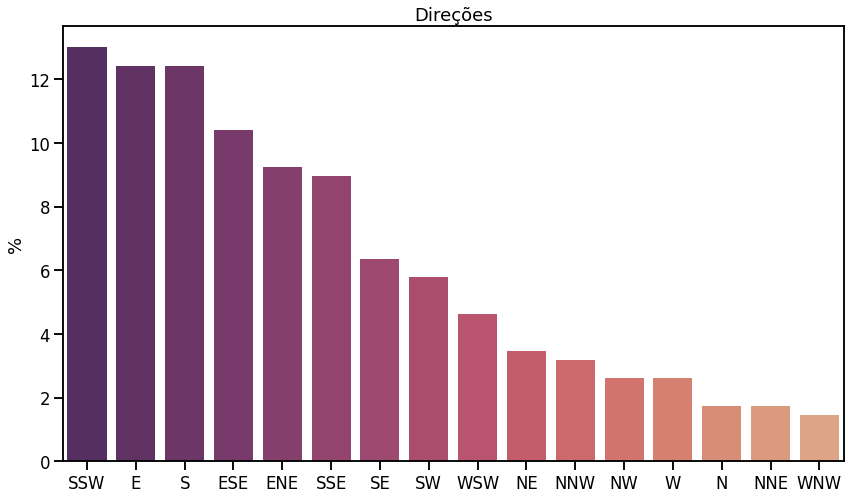

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

prop_direcoes = trajs_659['direcao_cat'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 8))
sns.set_context('talk')
sns.barplot(x=prop_direcoes.index, y=prop_direcoes, palette='flare_r')
plt.ylabel('%')
plt.title('Direções')

<h3> E das velocidades e chuvas (soma por evento)?

In [7]:
velocidades = ['0-5 km/h', '5-10 km/h', '10-15 km/h', '15-20 km/h', '20-25 km/h', '25-30 km/h', '30-35 km/h', '35-40 km/h','40-45 km/h']

prop_velocidades = trajs_659['velocidade_cat'].value_counts(normalize=True)* 100
prop_velocidades = prop_velocidades.reindex(index=velocidades)

Text(0.5, 1.0, 'Velocidades')

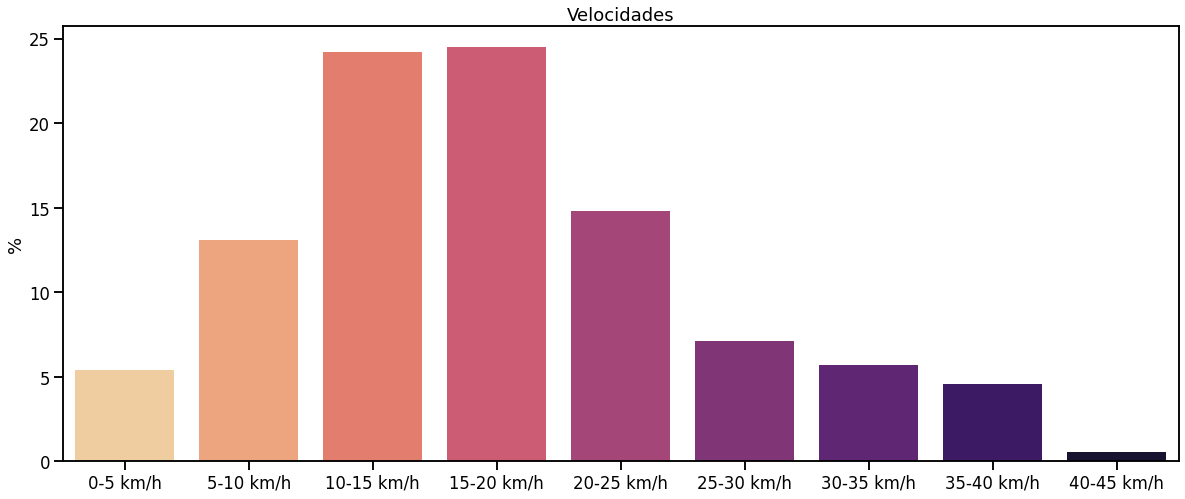

In [8]:
plt.figure(figsize=(20, 8))
sns.set_context('talk')
sns.barplot(x=prop_velocidades.index, y=prop_velocidades, palette='magma_r')
plt.ylabel('%')
plt.title('Velocidades')

In [9]:
chuvas = ['5-20 mm', '20-35 mm', '35-50 mm', '50-65 mm', '65-80 mm', '80-95 mm', '95-110 mm', '110-125 mm', '125-130 mm']

prop_chuvas = trajs_659['evt_sum_rain_cat'].value_counts(normalize=True).sort_index() * 100
prop_chuvas = prop_chuvas.reindex(index=chuvas)

Text(0.5, 1.0, 'Precipitação')

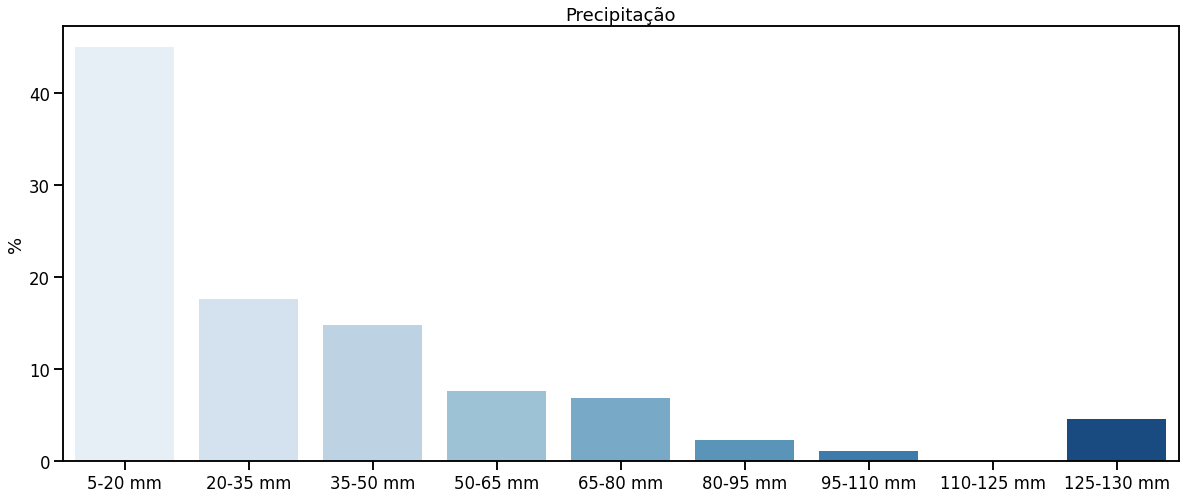

In [16]:
plt.figure(figsize=(20, 8))
sns.barplot(x=prop_chuvas.index, y=prop_chuvas, palette='Blues')
plt.ylabel('%')
plt.title('Precipitação')

## Precipitação

<h3> Mas qual será a distribuição das precipitações em cada direção? Será que existe uma direção que tende a provocar chuvas fortes ou enxurradas?

(Text(0, 0.5, 'Soma de precipitação do evento (mm)'), Text(0.5, 0, 'Direção'))

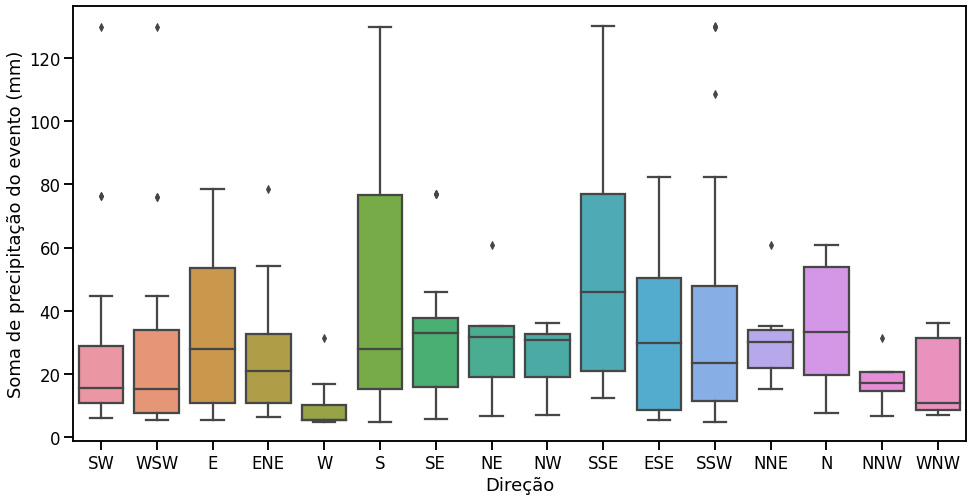

In [15]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=trajs_659, x='direcao_cat', y='evt_sum_rain')
plt.ylabel('Soma de precipitação do evento (mm)'), plt.xlabel('Direção')